# Alucar - Analisando as vendas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
alucar = pd.read_csv('dataset/alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [3]:
print(f'Quantidade de linhas e colunas: {alucar.shape}')

Quantidade de linhas e colunas: (24, 2)


In [4]:
print(f'Quantidades de dados nulos: {alucar.isna().sum().sum()}')

Quantidades de dados nulos: 0


In [5]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [6]:
alucar['mes'] = pd.to_datetime(alucar['mes'])

In [7]:
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [8]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [9]:
print(sns.__version__)

0.11.1


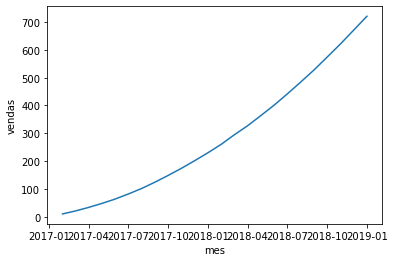

In [10]:
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.show()

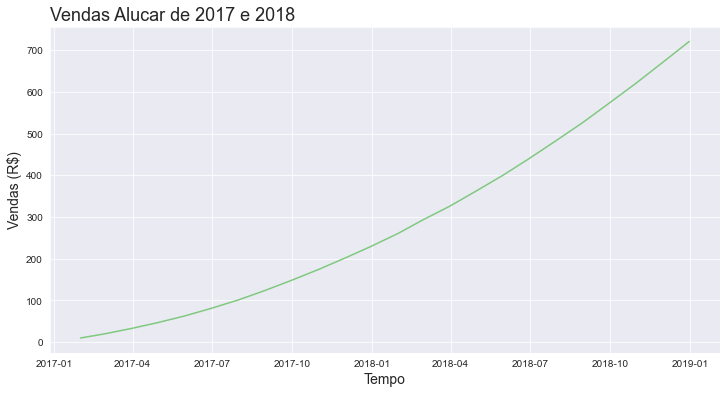

In [11]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
plt.show()

In [13]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


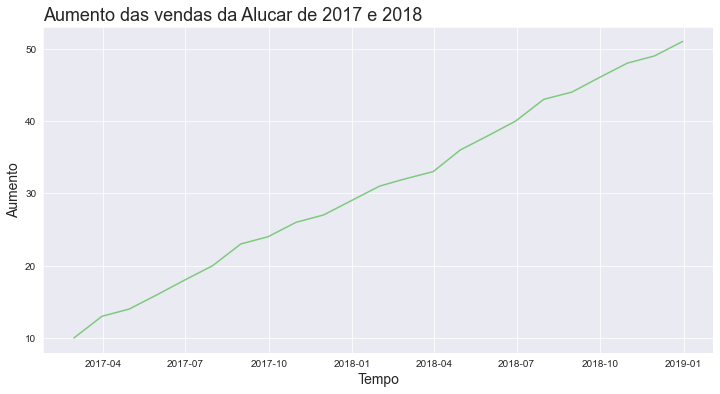

In [16]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
plt.show()

In [17]:
def plotar(titulo, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    plt.show()

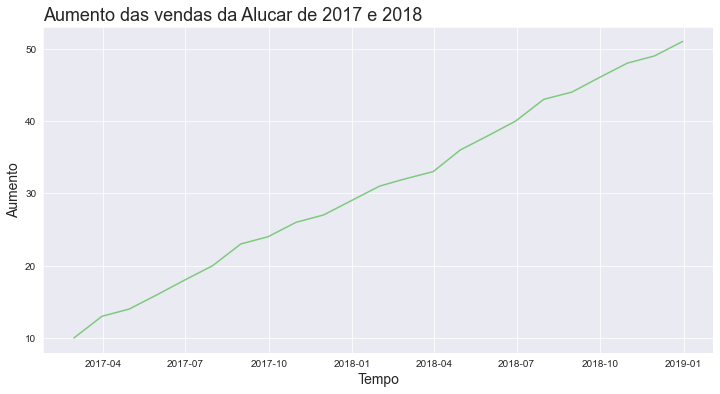

In [22]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [23]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


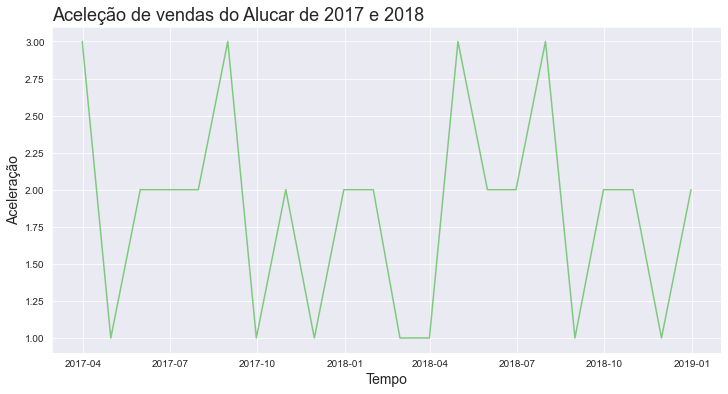

In [24]:
plotar('Aceleção de vendas do Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

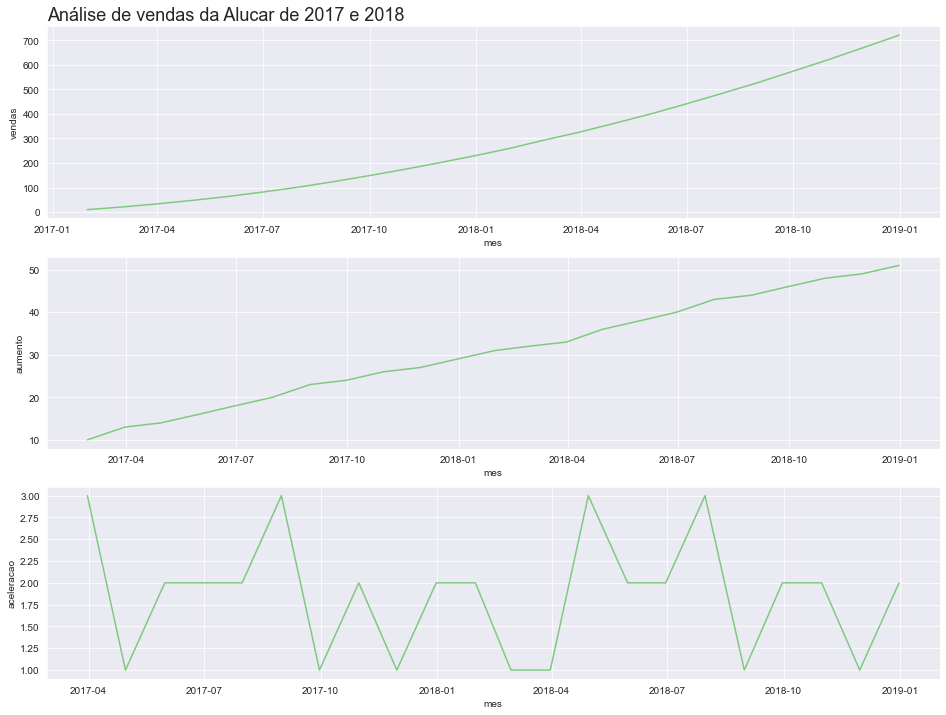

In [27]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
ax = sns.lineplot(x='mes', y='aceleracao', data=alucar)

In [31]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    ax = sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    ax = sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    ax = sns.lineplot(x=x, y=y2, data=dataset)

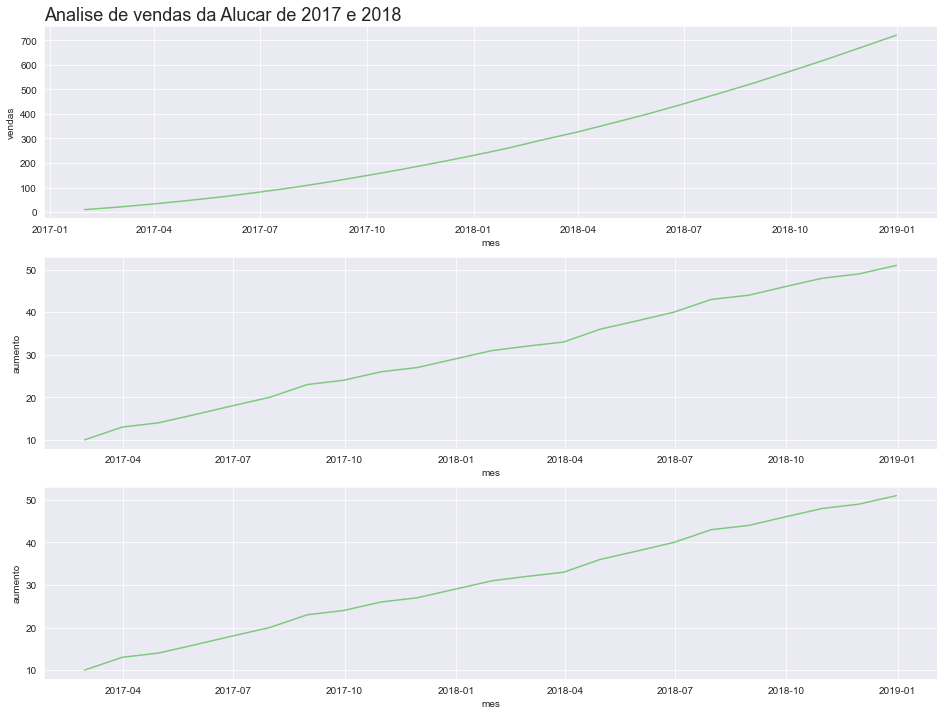

In [32]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Analise das vendas da Alucar de 2017 e 2018')

In [33]:
from pandas.plotting import autocorrelation_plot

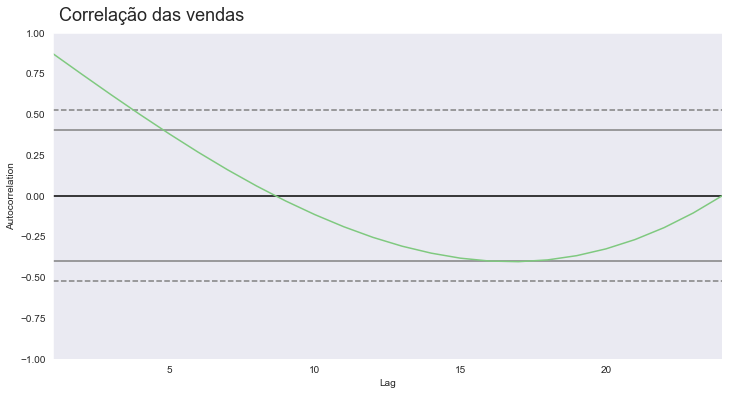

In [54]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.24, y=0.94)
autocorrelation_plot(alucar['vendas'])
plt.show()

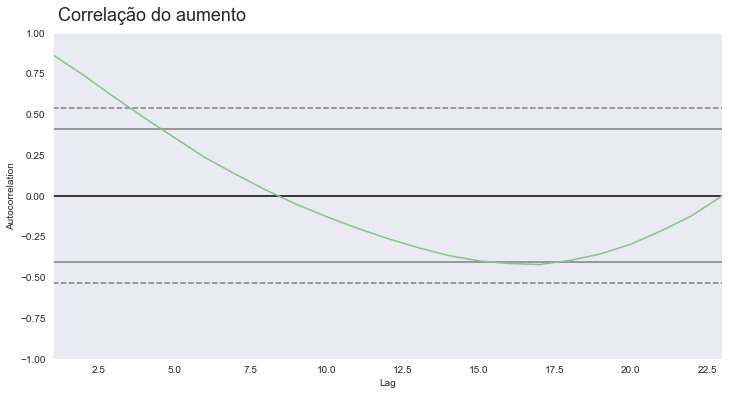

In [56]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.24, y=0.94)
autocorrelation_plot(alucar['aumento'][1:])
plt.show()

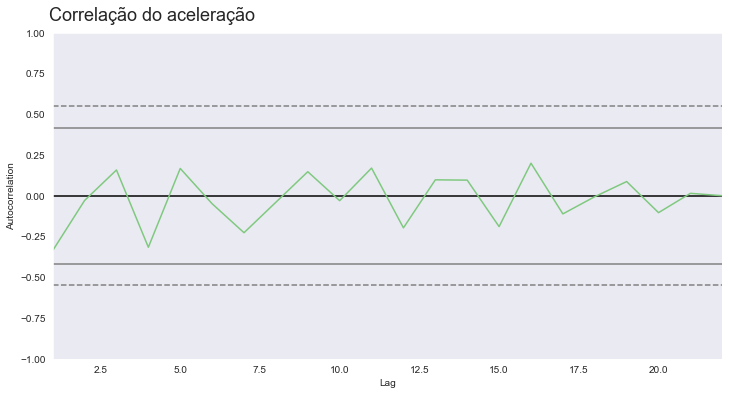

In [58]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aceleração', fontsize=18, x=0.24, y=0.94)
autocorrelation_plot(alucar['aceleracao'][2:])
plt.show()